#  Analysis of susceptibility-temperature, <span style="font-family: 'Times New Roman';">*(Kappabridge $\chi$-T)*</span>, data
-------------------------------------------------------------------------------------------------------------------------

This notebook allows the user to: 

(1) Download a contribution from the MagIC database.

(2) Extract any susceptibility-temperature, <span style="font-family: 'Times New Roman';">*$\chi$-T*</span>, data contained within it.

(3) Correct for the diamagnetic signal of the measurement instrument and holder (optional).

(4) Smooth the data prior to further anaysis (optional).

(5) Calculate first and second-order derivatives of the curves for qualitatively estimating Curie temperatures.

The notebook is to be run cell-by-cell to allow users to select corrections/filters as needed. The code below runs an example dataset from [Doctor and Feinberg (2022)](https://doi.org/10.1029/2021JB023789), Differential thermal analysis using high temperature susceptibility instruments, *Journal of Geophysical Research: Solid Earth*, which is MagiC contribution [19369](http://dx.doi.org/10.7288/V4/MAGIC/19369). Any MagIC contribution which contains <span style="font-family: 'Times New Roman';">*$\chi$-T*</span> data can be used in place of this example dataset.

**Nota bene:** We do not provide Curie Temperature estimation by the "two-tangent" method, as proposed for spontaneous magnetization  <span style="font-family: 'Times New Roman';">*M<sub>s</sub>(T)*</span> curves by [Grommé et al. (1969)](https://doi.org/10.1029/JB074i022p05277). [Fabian et al. (2013)](https://doi.org/10.1029/2012GC004440) explain this well:

_"The importance of the difference between determining <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span> from <span style="font-family: 'Times New Roman';">M<sub>s</sub>(T)</span> and <span style="font-family: 'Times New Roman';">*$\chi$-T*</span> is pointed out by [Petrovský and Kapicka (2006)](https://doi.org/10.1029/2006JB004507), where methods to determine <span style="font-family: 'Times New Roman';">T<sub>c</sub></span> from measurements of the initial susceptibility are analyzed. They conclude that the two-tangent method is not suitable for <span style="font-family: 'Times New Roman';">*$\chi$-T*</span> and can considerably overestimate <span style="font-family: 'Times New Roman';">T<sub>c</sub></span>. The physical origin of  <span style="font-family: 'Times New Roman';">*$\chi$-T*</span> close to <span style="font-family: 'Times New Roman';">T<sub>c</sub></span> is more challenging than that of <span style="font-family: 'Times New Roman';">M<sub>s</sub>(T)</span>, because a number of low-field effects are important for <span style="font-family: 'Times New Roman';">*$\chi$-T*</span>, but become negligible in the higher fields used to infer <span style="font-family: 'Times New Roman';">M<sub>s</sub>(T)</span>. The variation of <span style="font-family: 'Times New Roman';">m</span> depends not only on the variation of <span style="font-family: 'Times New Roman';">M<sub>s</sub>(H,T)</span> with field  <span style="font-family: 'Times New Roman';">H</span>, it also contains a contribution from a rotation of the ordered moment with respect to an easy magnetization axis, and contributions from thermally activated switching of small independent – but already magnetically ordered – regions (e.g., SP particles). In large bulk material domain-wall movement contributes to <span style="font-family: 'Times New Roman';">*$\chi$-T*</span> even slightly below  <span style="font-family: 'Times New Roman';">Tc</span>. In nanoparticles the inhomogeneity of <span style="font-family: 'Times New Roman';">M<sub>s</sub></span>, due to the different exchangecoupling of inner and surface atoms, is of additional importance."_

And from [Petrovský and Kapicka (2006)](https://doi.org/10.1029/2006JB004507):

_"...susceptibility for T [to] <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span> and T < <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span> increases to infinity, and we have to use analytical formulas developed for susceptibility behavior above the Curie point. Here, due to the geometry of the susceptibility curve, the two-tangent method will always yield temperature above the inflection point, which is higher than the temperature at which the substance starts to obey the paramagnetic Curie-Weiss law. The resulting error in <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span> (or <span style="font-family: 'Times New Roman';">T<sub>N</sub><sup>1</sup></span>) can be on the order of several degrees to several tens of degrees. Therefore, in the case of temperature dependence of magnetic susceptibility, application of the two-tangent method is not justified."_

Furthermore:

_"In the case of synthetic magnetite and hematite, with sharp Hopkinson peak, the difference between transition
temperatures determined using the two-tangent method and Curie-Weiss paramagnetic law is in the order of some few
degrees. In the case of samples with wide susceptibility maximum and gradual decrease, reflecting e.g., wide distribution
of grain sizes, or in the case of substituted hematite, application of the two-tangent method to susceptibility curves overestimates the transition temperature be several tens of degrees."_

### Install and import packages

Click inside the cell below, hold shift and then press enter. This will automatically run the script below.

In [1]:
import rockmag as rmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb

## Import data

We can take the same approach as in the `rockmag_data_unpack.ipynb` notebook to bring the MagIC data into the notebook as a Contribution. 

To bring in a different contribution than the one shown in this example:
-  set the directory path (currently `'./example_data/X-T'`)
-  set the `magic_id` (19369 for  *Doctor and Feinberg (2022)*)
-  if the contribution is private, set the share key for your MagIC contribution which you can find by clicking on the "Share" button in the MagIC database.

<figure>
  <img src="https://raw.githubusercontent.com/PmagPy/RockmagPy-notebooks/main/book/images/MagIC_private_contribution_1.png" alt="Description of the image" width="800">
</figure>

Copy the share key highlighted in grey in the following image to the `share_key` parameter in the cell below.

<figure>
  <img src="https://raw.githubusercontent.com/PmagPy/RockmagPy-notebooks/main/book/images/MagIC_private_contribution_2.png" alt="Description of the image" width="800">
</figure>

In [2]:
#define these three parameters to match your data
magic_id = '19369'
share_key = ''
dir_path = 'example_data/X-T'

result, magic_file = ipmag.download_magic_from_id(magic_id, directory=dir_path, share_key=share_key)
ipmag.unpack_magic(magic_file, dir_path)
contribution = cb.Contribution(dir_path)
measurements = contribution.tables['measurements'].df
measurements.dropna(axis=1, how='all')

Download successful. File saved to: example_data/X-T/magic_contribution_19369.txt
working on:  'contribution'
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/contribution.txt
contribution  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/contribution.txt
working on:  'locations'
2  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/locations.txt
locations  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/locations.txt
working on:  'sites'
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/sites.txt
sites  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/sites.txt
working on:  'samples'
12  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/samples.txt
samples  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/X-T/samples.txt
worki

,citations,experiment,instrument_codes,meas_field_ac,meas_freq,meas_temp,measurement,method_codes,quality,specimen,standard,susc_chi_mass,sequence
measurement name,,,,,,,,,,,,,
IRM-KappaF-5928-1,This study,IRM-KappaF-5928,IRM-KappaF,0.000377,920,298.9,IRM-KappaF-5928-1,LP-X:LP-X-T,g,BHRS13-2B5L1A_01,u,0.000001,1
IRM-KappaF-5928-2,This study,IRM-KappaF-5928,IRM-KappaF,0.000377,920,302.3,IRM-KappaF-5928-2,LP-X:LP-X-T,g,BHRS13-2B5L1A_01,u,0.000001,2
IRM-KappaF-5928-3,This study,IRM-KappaF-5928,IRM-KappaF,0.000377,920,307.4,IRM-KappaF-5928-3,LP-X:LP-X-T,g,BHRS13-2B5L1A_01,u,0.000001,3
IRM-KappaF-5928-4,This study,IRM-KappaF-5928,IRM-KappaF,0.000377,920,312.3,IRM-KappaF-5928-4,LP-X:LP-X-T,g,BHRS13-2B5L1A_01,u,0.000001,4
IRM-KappaF-5928-5,This study,IRM-KappaF-5928,IRM-KappaF,0.000377,920,316.9,IRM-KappaF-5928-5,LP-X:LP-X-T,g,BHRS13-2B5L1A_01,u,0.000001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IRM-KappaF-5913-426,This study,IRM-KappaF-5913,IRM-KappaF,0.000377,920,328.4,IRM-KappaF-5913-426,LP-X:LP-X-T,g,vivian_A03,u,0.000001,20919
IRM-KappaF-5913-427,This study,IRM-KappaF-5913,IRM-KappaF,0.000377,920,326.6,IRM-KappaF-5913-427,LP-X:LP-X-T,g,vivian_A03,u,0.000001,20920
IRM-KappaF-5913-428,This study,IRM-KappaF-5913,IRM-KappaF,0.000377,920,325.0,IRM-KappaF-5913-428,LP-X:LP-X-T,g,vivian_A03,u,0.000001,20921


## The project export contains data from all the experiments

Each measurement in a MagIC measurements table has a `method_codes` value. These method codes come from a "controlled vocabulary" (https://www2.earthref.org/MagIC/method-codes). 

In the method codes used for the example contribution:
- `LP` refers to lab protocol
- `X-T` refers to susceptibility vs. temperature experiments done on the Kappabridge

In [3]:
measurements.method_codes.unique()

array(['LP-X:LP-X-T', 'LP-X-T'], dtype=object)

## Select a <span style="font-family: 'Times New Roman';">*$\chi$-T*</span> Experiment
*Creates a dropdown to select specimens with <span style="font-family: 'Times New Roman';">*$\chi$*-T</span> data.*

In [4]:
specimen, experiment = rmag.interactive_specimen_experiment_selection(measurements)

Dropdown(description='specimen:', options=('BHRS13-2B5L1A_01', 'BHRS13-2B5L1B_01', 'blank_A01', 'blank_A10', '…

Dropdown(description='Experiment:', options=('IRM-KappaF-5928',), value='IRM-KappaF-5928')

In [5]:
selected_experiment = measurements[(measurements['specimen']==specimen.value) & 
                                      (measurements['experiment']==experiment.value)].reset_index(drop=1)

## Plot $\chi$-T data, the derivatives, and inverse $\chi$-T

- Your data might be noisy, which may hinder assessing reversibility for understanding alteration. The following code will perform a running average of data over a temperature interval that you can define. In the following cell, change the value associated with variable `temp_window` to set the desired temperature window for the running average.

- Holder removal: Set `remove_holder` parameter to be `True`. We assume that the lowest susceptibility value during the whole measurement is the holder signal, and that this happens after the specimen is heated above the critical temperature such that it is paramagnetic and the holder signal is dominant.

Three graphs will be created. 

(1) The top graph shows the raw data as points and the smoothed data as lines, for the temperature window size selected. 

(2) The second graph plots the derivatives based on the smoothed data in the top graph.

(3) The third graph plots the inverse susceptibility data, which can also be used to qualitatively assess the Curie temperature.

### Calculate <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span> using inverse susceptibility

Above <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span> a mineral phase will be paramagnetic. This means that the inverse susceptibility should have a linear positive slope above <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span>. Using the intercept temperature at 0 inverse susceptibility is a good guess for  <span style="font-family: 'Times New Roman';">*T<sub>c</sub>*</span>. This is essentially the break of slope between the ferromagnetic and paramagnetic signal.

In [8]:
fig, fig_dXdT, fig_inv = rmag.plot_X_T(selected_experiment, 
                                       temp_unit='C', 
                                       remove_holder=True, 
                                       smooth_window=10)

## Save the figures

In [ ]:
## code for saving the figures in png format
# save the first figure
fig.write_image("fig.png")

In [ ]:
# save the dX/dT figure
fig_dXdT.write_image("fig_dXdT.png")

In [ ]:
# save the 1/X vs T figure
fig_inv.write_image("fig_inv.png")

## Determining the best temperature window for smoothing

The following function plots the **model roughness** against the **root mean square error** of the model **(note that the y-axis is inverted)** (a measure of the difference between the running average and the data). Each point on the graph is for a different temperature window size. The `knee` in the curve (the break of slope) is the optimal tempeature window. At this point (window) there is a decent trade off between the smoothness of the model (the running average) and error on the model.

set values for `min_temp_window` and `max_temp_window` to set the temperature range for exploring the rms and variance tradeoff.

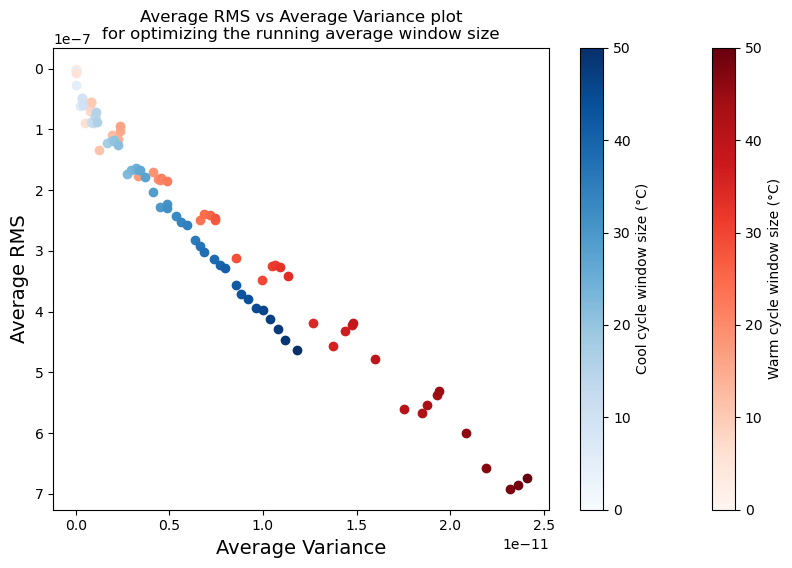

In [ ]:
min_temp_window = 0
max_temp_window = 50
steps = 50
fig, ax = rmag.optimize_X_T_running_average_window(selected_experiment, min_temp_window, max_temp_window, steps=steps)

In [ ]:
# save the figure
fig.savefig("optimize_window_size.png")